In [91]:
# Run some setup code for this notebook.
import matplotlib.pyplot as plt
import numpy as np


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
import pandas as pd
df = pd.read_csv('./data/mnist.csv') 
data = df.values
X = data[:, 1:]
y = data[:, 0]

print(f"{X.shape = }, {y.shape = }")

X.shape = (407, 784), y.shape = (407,)


c:\Users\cpchenpi\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


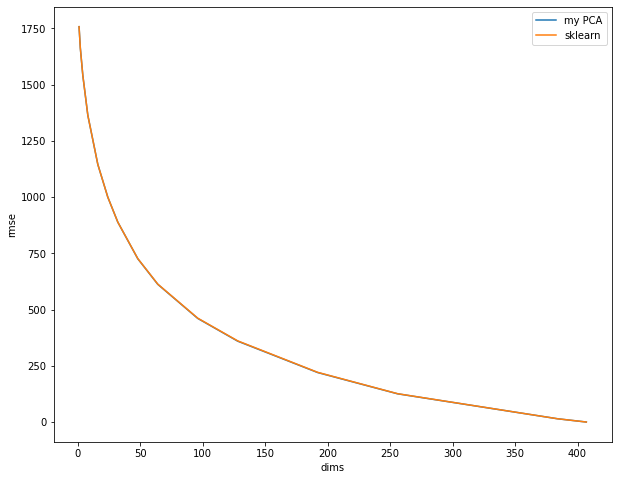

In [93]:
def calc_rmse(X: np.ndarray, Y: np.ndarray):
    return np.sqrt(np.mean(np.sum(np.square(X - Y), axis = 1)))

def reconstruct_rmse(d: int, vals: np.ndarray, vecs: np.ndarray, X:np.ndarray):
    vals, vecs = vals[:d], vecs[:d]
    Z = X @ vecs.T
    X_construct = Z @ vecs
    return calc_rmse(X, X_construct)

def sklearn_rmse(d: int, X:np.ndarray):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=d)
    return calc_rmse(X, pca.inverse_transform(pca.fit_transform(X)))

# 实现pca算法并对比sklearn
X_mean = np.average(X, axis = 0)
X = X - X_mean
vals, vecs = np.linalg.eig(X.T @ X)
vecs = vecs.T

dims = [1, 2, 4, 8, 16, 24, 32, 48, 64, 96, 128, 192, 256, 384, 407]
reconstruct_rmses = [reconstruct_rmse(d, vals, vecs, X) for d in dims]
sklearn_rmses = [sklearn_rmse(d, X) for d in dims]
plt.xlabel('dims')
plt.ylabel('rmse')
plt.plot(dims, reconstruct_rmses)
plt.plot(dims, sklearn_rmses)
plt.legend(['my PCA', 'sklearn'])
plt.show()

In [94]:
# 实现流形学习算法
d = 2
m = X.shape[0]

inner_prod = X @ X.T
self_prod = np.diagonal(inner_prod)
dis_square = self_prod + self_prod[:][np.newaxis] - 2 * inner_prod
dis_sqsum = np.sum(dis_square, axis=0) / m
dis_all = np.sum(dis_sqsum) / m
B = (-dis_square - dis_all + dis_sqsum + dis_sqsum[:][np.newaxis] ) / 2

vals, vecs = np.linalg.eig(B)
vals, vecs = vals[:d], vecs[:, :d]
X_reduced = vecs @ np.diag(vals)

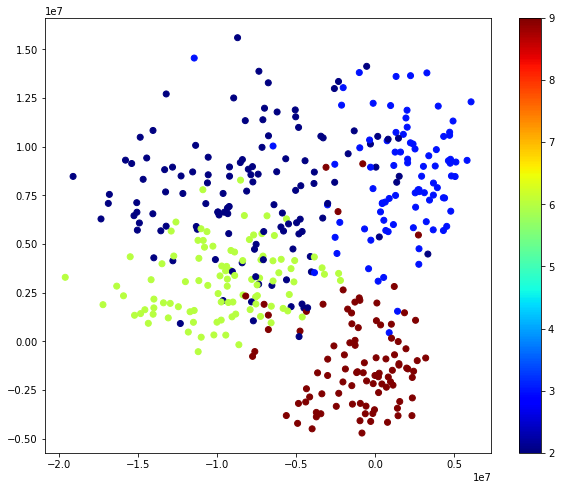

In [95]:
# 可视化降维结果
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.colorbar()
plt.show()